# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
#Сделано при помощи: https://habr.com/ru/company/vk/blog/438562/

boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Wall time: 1.7 s
Train ROC-AUC 0.9862
Valid ROC-AUC 0.9272
Test ROC-AUC 0.9282


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

<AxesSubplot:title={'center':'Перебор глубины'}, xlabel='Глубина', ylabel='Значения качества'>

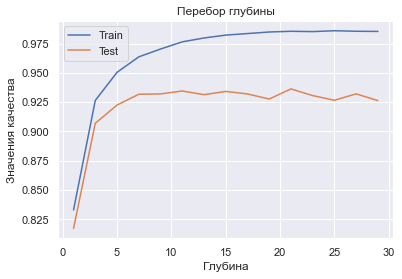

In [7]:
depths = range(1, 30, 2)

train_error = []
test_error = []

for i in depths:
    base_model_params= {"max_depth":i}
    boosting = Boosting(base_model_params = base_model_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_error.append(boosting.score(x_train, y_train))
    test_error.append(boosting.score(x_test, y_test))

sns.lineplot(x=depths, y=train_error, label="Train").set(title='Перебор глубины', xlabel='Глубина', ylabel='Значения качества')
sns.lineplot(x=depths, y=test_error, label="Test")

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

__Ответ:__ Сложно сказать наверняка -- график будет меняться с каждым перезапуском из-за бутстрапирования. Но есть определённый тренд, при котором до этого неуклонно растущее значение качества на тестовой выборке начинает замедляться и потом выходит на плато, после того, как проходит рубеж 5-7. Это значит, что на этом самом рубеже тестовое качество достигает своего максимума, а дальше модель будет только переобучаться, что видно на примере тренировочной выборки. Исходя из этого, лучшей моделью может считаться 7 модель, тк примерно с неё тестовая ошибка начинает выходить на плато.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [8]:
#P.S.: Я очень старалась сделать через GridSearchCV, но ничего не получалось, извините, что пришлось в итоге делать всё так топорно :с

base_model_params = {
    "min_samples_split": [15, 5, 2],
    "min_samples_leaf": [15, 5, 1]
}
parameters = {
    "n_estimators": range(1, 20, 2),
    "learning_rate": [0.05, 0.075, 0.1, 0.125, 0.15]
}

best_parameters = {
    "n_estimators": None,
    "learning_rate": None,
    "min_samples_split": None,
    "min_samples_leaf": None
}

best_error = -1

for n_estimators in parameters['n_estimators']:
    for learning_rate in parameters['learning_rate']:
        for min_samples_split in base_model_params['min_samples_split']:
            for min_samples_leaf in base_model_params['min_samples_leaf']:
                base_model_params_temp = {
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf
                    }
                boosting = Boosting(
                    base_model_params = base_model_params_temp,
                    n_estimators = n_estimators,
                    learning_rate = learning_rate                    
                    )
                boosting.fit(x_train, y_train, x_valid, y_valid)
                error = boosting.score(x_test, y_test)                    
                if error > best_error:
                    best_error = error
                    best_parameters = {
                        "n_estimators": n_estimators,
                        "learning_rate": learning_rate,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf
                        }

print(f'Best ROC-AUC: {best_error}, Best parameters: {best_parameters}')

Best ROC-AUC: 0.9372975785792673, Best parameters: {'n_estimators': 13, 'learning_rate': 0.05, 'min_samples_split': 15, 'min_samples_leaf': 1}


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [9]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

parameters_xgboost = {
    "n_estimators": range(25, 35, 2),
    "eta": [0.05, 0.075, 0.1, 0.25, 0.5], #learning_rate
    "gamma": [2.5, 3, 3.5], #min_split_loss
    "min_child_weight": [0, 0.005, 0.010, 0.015, 0.020]
}

best_parameters_xgboost = {
    "n_estimators": None,
    "eta": None,
    "gamma": None,
    "min_child_weight": None    
}

best_error_xgboost = -1

for n_estimators in parameters_xgboost['n_estimators']:
    for eta in parameters_xgboost['eta']:
        for gamma in parameters_xgboost['gamma']:
            for min_child_weight in parameters_xgboost['min_child_weight']:
                regressor = xgb.XGBRegressor(
                    n_estimators = n_estimators,
                    eta = eta,
                    gamma = gamma,
                    min_child_weight = min_child_weight
                    )
                regressor.fit(x_valid, y_valid)
                y_pred = regressor.predict(x_test)
                error = roc_auc_score(y_test, y_pred)                    
                if error > best_error_xgboost:
                    best_error_xgboost = error
                    best_parameters_xgboost = {
                        "n_estimators": n_estimators,
                        "eta": eta,
                        "gamma": gamma,
                        "min_child_weight": min_child_weight
                        }

print(f'Best ROC-AUC: {best_error_xgboost}, Best parameters: {best_parameters_xgboost}')

Best ROC-AUC: 0.9314124980515585, Best parameters: {'n_estimators': 33, 'eta': 0.1, 'gamma': 2.5, 'min_child_weight': 0}


__Ответ__: Результат вышел незначительно хуже, но, возможно, всё дело в том, какие гиперпараметры были выбраны. Возможно, если бы выбраны другие гиперпараметры, результат вышел бы другим. Но для данных гиперпараметров вышел такой результат. Но стоит отметить, что результаты посчитались куда быстрее, чем в случае с перебором параметров по бустингу.

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [10]:
import optuna

def opt_boosting(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 20, 2),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "base_model_params":{
            "max_depth": trial.suggest_int("max_depth", 2, 15),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15)
        }
    }

    boosting = Boosting(**param)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    error = boosting.score(x_test, y_test)  
    return error

def opt_xgboost(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 25, 35, 2),
        "eta": trial.suggest_float("eta", 0.05, 0.5),
        "gamma": trial.suggest_int("gamma", 2.5, 3.5),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 0.020)
    }
    regressor = xgb.XGBRegressor(**param)
    regressor.fit(x_valid, y_valid)
    y_pred = regressor.predict(x_test)
    error = roc_auc_score(y_test, y_pred)
    return error

optuna.logging.disable_default_handler()
study_boosting = optuna.create_study(direction="maximize")
study_boosting.optimize(opt_boosting, n_trials=100, show_progress_bar=False)

study_xgboost = optuna.create_study(direction="maximize")
study_xgboost.optimize(opt_xgboost, n_trials=100, show_progress_bar=False)

print(f"Best result for boosting: {study_boosting.best_value}")
print(f"Best parameters for boosting: {study_boosting.best_params}")

print(f"Best result for xgboost: {study_xgboost.best_value}")
print(f"Best parameters for xgboost: {study_xgboost.best_params}")

Best result for boosting: 0.9362934423725798
Best parameters for boosting: {'n_estimators': 13, 'learning_rate': 0.056561417381203904, 'max_depth': 13, 'min_samples_leaf': 4}
Best result for xgboost: 0.9312479629929951
Best parameters for xgboost: {'n_estimators': 27, 'eta': 0.15674610016873244, 'gamma': 3, 'min_child_weight': 0}


__Важное примечание!__ Для создания собственного бустинга было использовано готовое решение по данной ссылке https://habr.com/ru/company/vk/blog/438562/, но в процессе работы данное решение было множество раз модифицировано, чтобы более подходить условиям задачи